# 分析104年新北市景點在夏季７月與冬季12月的旅客人數關係

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Taipei_view.csv')

資料下載：https://data.gov.tw/dataset/44016

In [3]:
df.head()

,Year,ScenicSpots,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,104,林本源園邸,44820,44198,34209.0,40214.0,39353.0,29550.0,34856.0,30662.0,27964.0,40779.0,43828.0,35799.0,446232
1,104,碧潭風景特定區,120000,154000,93300.0,140000.0,118850.0,167000.0,138000.0,91640.0,93000.0,135000.0,122055.0,129000.0,1501845
2,104,新北市立鶯歌陶瓷博物館,85177,76951,68343.0,106135.0,90282.0,127698.0,138154.0,125541.0,76160.0,97091.0,91613.0,70118.0,1153263
3,104,鶯歌老街,51648,63895,49245.0,48091.0,50046.0,52433.0,52380.0,50180.0,50276.0,54970.0,53648.0,51568.0,628380
4,104,清水祖師廟,1930,3401,957.0,1074.0,1826.0,1015.0,1453.0,1060.0,1420.0,1964.0,1467.0,1226.0,18793


# 整理資料

In [4]:
df.drop(['January','February','March','April','May','June','August','September','October','November','Total'],axis=1,inplace=True)

In [5]:
df.head()

,Year,ScenicSpots,July,December
0,104,林本源園邸,34856.0,35799.0
1,104,碧潭風景特定區,138000.0,129000.0
2,104,新北市立鶯歌陶瓷博物館,138154.0,70118.0
3,104,鶯歌老街,52380.0,51568.0
4,104,清水祖師廟,1453.0,1226.0


In [6]:
df2=df[:28]

In [7]:
df2.head()

,Year,ScenicSpots,July,December
0,104,林本源園邸,34856.0,35799.0
1,104,碧潭風景特定區,138000.0,129000.0
2,104,新北市立鶯歌陶瓷博物館,138154.0,70118.0
3,104,鶯歌老街,52380.0,51568.0
4,104,清水祖師廟,1453.0,1226.0


In [8]:
x = np.array(df2.July) #7月
y = np.array(df2.December) #12月

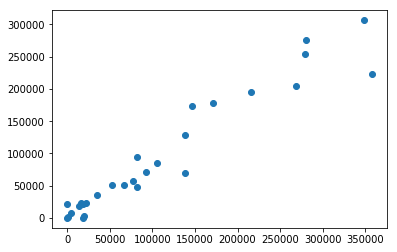

In [9]:
plt.scatter(x, y)

根據上圖可以看出，7月與12月的人數有正相關，而且接近線性，以下是利用線性回歸得到的結果。

In [10]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X=x.reshape(len(x),1)
Y=y.reshape(len(y),1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10000)

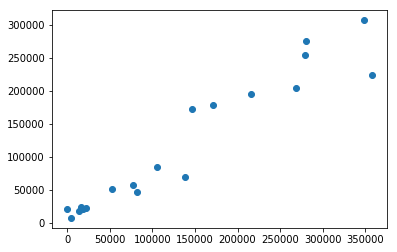

In [12]:
plt.scatter(x_train,y_train)

In [13]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
Y_pred=regr.predict(x_test)

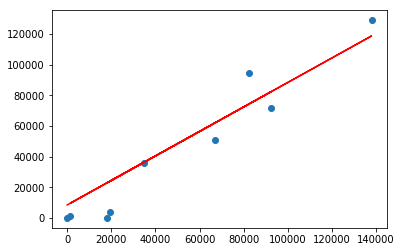

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')

In [16]:
regr.score(x_test, y_test) 

0.8974089930528822

預測準確率